In [1]:
import pandas as pd
import numpy as np

In [2]:
# 'date' 열을 timepstamp 형태로 파일에서 읽어오자!

df = pd.read_csv('stocks.csv', parse_dates=['date'], index_col='date')

In [4]:
df.loc[pd.date_range(df.index[0], df.index[-1], freq='BM')].head()

KeyError: 'Passing list-likes to .loc or [] with any missing labels is no longer supported, see https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike'

In [6]:
df.resample('BM').mean() #down sampling

,Unnamed: 0,AA,GE,IBM,MSFT
date,,,,,
1990-02-28,9.0,5.043684,2.873158,17.781579,0.523158
1990-03-30,29.5,5.362273,2.963636,18.466818,0.595000
1990-04-30,50.5,5.141000,3.037500,18.767500,0.638500
1990-05-31,71.5,5.278182,3.160000,20.121818,0.731364
1990-06-29,93.0,5.399048,3.275714,20.933810,0.821429
...,...,...,...,...,...
2011-06-30,5386.5,15.390000,18.295000,164.875455,24.299091
2011-07-29,5407.5,15.648000,18.500500,178.204500,26.799000
2011-08-31,5429.0,12.353478,15.878261,169.194348,25.317826


In [7]:
df.resample('BM').size()

date
1990-02-28    19
1990-03-30    22
1990-04-30    20
1990-05-31    22
1990-06-29    21
              ..
2011-06-30    22
2011-07-29    20
2011-08-31    23
2011-09-30    21
2011-10-31    10
Freq: BM, Length: 261, dtype: int64

In [8]:
df.resample('BM').count()

,Unnamed: 0,AA,GE,IBM,MSFT
date,,,,,
1990-02-28,19,19,19,19,19
1990-03-30,22,22,22,22,22
1990-04-30,20,20,20,20,20
1990-05-31,22,22,22,22,22
1990-06-29,21,21,21,21,21
...,...,...,...,...,...
2011-06-30,22,22,22,22,22
2011-07-29,20,20,20,20,20
2011-08-31,23,23,23,23,23


In [11]:
#domwsampling
ds = df.resample('BM').asfreq().head()
ds
# upsampling
rs = ds.resample('B').asfreq()

In [12]:
rs

,Unnamed: 0,AA,GE,IBM,MSFT
date,,,,,
1990-02-28,18.0,5.22,2.89,18.06,0.54
1990-03-01,NaN,NaN,NaN,NaN,NaN
1990-03-02,NaN,NaN,NaN,NaN,NaN
1990-03-05,NaN,NaN,NaN,NaN,NaN
1990-03-06,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1990-06-25,NaN,NaN,NaN,NaN,NaN
1990-06-26,NaN,NaN,NaN,NaN,NaN
1990-06-27,NaN,NaN,NaN,NaN,NaN


In [13]:
rs = ds.resample('B').asfreq().fillna(method='ffill')

In [15]:
rs.head(25)

,Unnamed: 0,AA,GE,IBM,MSFT
date,,,,,
1990-02-28,18.0,5.22,2.89,18.06,0.54
1990-03-01,18.0,5.22,2.89,18.06,0.54
1990-03-02,18.0,5.22,2.89,18.06,0.54
1990-03-05,18.0,5.22,2.89,18.06,0.54
1990-03-06,18.0,5.22,2.89,18.06,0.54
1990-03-07,18.0,5.22,2.89,18.06,0.54
1990-03-08,18.0,5.22,2.89,18.06,0.54
1990-03-09,18.0,5.22,2.89,18.06,0.54
1990-03-12,18.0,5.22,2.89,18.06,0.54


In [16]:
rs = ds.resample('B').asfreq().fillna(method='bfill')

In [17]:
rs.head(25)

,Unnamed: 0,AA,GE,IBM,MSFT
date,,,,,
1990-02-28,18.0,5.22,2.89,18.06,0.54
1990-03-01,40.0,5.26,3.01,18.45,0.60
1990-03-02,40.0,5.26,3.01,18.45,0.60
1990-03-05,40.0,5.26,3.01,18.45,0.60
1990-03-06,40.0,5.26,3.01,18.45,0.60
1990-03-07,40.0,5.26,3.01,18.45,0.60
1990-03-08,40.0,5.26,3.01,18.45,0.60
1990-03-09,40.0,5.26,3.01,18.45,0.60
1990-03-12,40.0,5.26,3.01,18.45,0.60


In [24]:
import matplotlib.pyplot as plt

In [25]:
df.head()

,Unnamed: 0,AA,GE,IBM,MSFT
date,,,,,
1990-02-01,0,4.98,2.87,16.79,0.51
1990-02-02,1,5.04,2.87,16.89,0.51
1990-02-05,2,5.07,2.87,17.32,0.51
1990-02-06,3,5.01,2.88,17.56,0.51
1990-02-07,4,5.04,2.91,17.93,0.51


In [26]:
del df['Unnamed: 0']

In [27]:
df.head()

,AA,GE,IBM,MSFT
date,,,,
1990-02-01,4.98,2.87,16.79,0.51
1990-02-02,5.04,2.87,16.89,0.51
1990-02-05,5.07,2.87,17.32,0.51
1990-02-06,5.01,2.88,17.56,0.51
1990-02-07,5.04,2.91,17.93,0.51


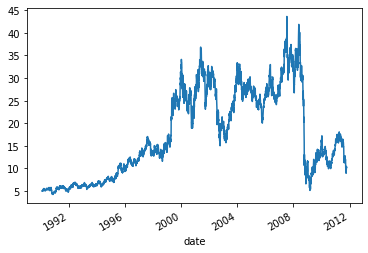

In [28]:
df.AA.plot()
plt.show()

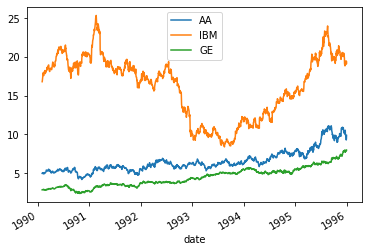

In [29]:
df.loc['1990':'1995', ['AA', 'IBM', 'GE']].plot()
plt.show()

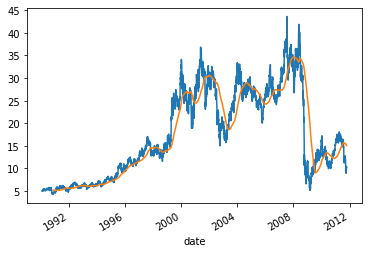

In [30]:
df.AA.plot()
df.AA.rolling(window=200).mean().plot()
plt.show()

###  1. 20년간 각 연도별 최고 기온, 최저지온, 최고 평균 기온, 최저 평균을 구해보시오.
###  2. 특정 날짜의 범위를 지정하면 그 기간 동안의 최고 온도(빨간색), 최저 온도(파란색), 평균 온도(녹색)를 그래프로 그려주는 함수를 만드시오.

In [31]:
import pandas as pd

df_tempdata = pd.read_csv('daegu_temp_20years.csv', encoding='ms949',skiprows=7,
                          index_col='날짜', parse_dates=['날짜'])

In [32]:
df_tempdata.head()

,지점,평균기온(℃),최저기온(℃),최고기온(℃)
날짜,,,,
2000-06-21,143,26.9,23.2,33.0
2000-06-22,143,21.5,20.3,23.4
2000-06-23,143,24.0,20.7,28.3
2000-06-24,143,21.2,20.1,22.4
2000-06-25,143,23.4,20.2,26.9


In [33]:
df_tempdata['2020'].max()

지점         143.0
평균기온(℃)     29.1
최저기온(℃)     25.9
최고기온(℃)     37.0
dtype: float64

In [34]:
df2 = df_tempdata.to_period('A')

In [35]:
df2.head()

,지점,평균기온(℃),최저기온(℃),최고기온(℃)
날짜,,,,
2000,143,26.9,23.2,33.0
2000,143,21.5,20.3,23.4
2000,143,24.0,20.7,28.3
2000,143,21.2,20.1,22.4
2000,143,23.4,20.2,26.9


In [36]:
df2.tail()

,지점,평균기온(℃),최저기온(℃),최고기온(℃)
날짜,,,,
2020,143,22.2,16.8,28.8
2020,143,22.7,17.3,28.8
2020,143,22.4,16.8,27.6
2020,143,24.3,20.5,28.0
2020,143,29.1,25.9,32.8


In [38]:
del df2['지점']

In [39]:
df2.groupby('날짜').max()

,평균기온(℃),최저기온(℃),최고기온(℃)
날짜,,,
2000,30.5,27.4,34.8
2001,31.0,27.8,35.8
2002,30.5,26.9,35.4
2003,29.4,25.5,34.7
2004,31.3,27.2,36.9
2005,30.7,27.2,36.2
2006,31.1,27.2,37.2
2007,30.4,26.3,36.4
2008,31.0,27.3,36.2


In [40]:
max_temp = df2.groupby('날짜').max()['최고기온(℃)']

In [41]:
max_temp.head()

날짜
2000    34.8
2001    35.8
2002    35.4
2003    34.7
2004    36.9
Freq: A-DEC, Name: 최고기온(℃), dtype: float64

In [42]:
min_temp = df2.groupby('날짜').min()['최저기온(℃)']

In [43]:
min_temp.head()

날짜
2000    -6.8
2001   -11.7
2002    -8.5
2003   -10.9
2004   -11.8
Freq: A-DEC, Name: 최저기온(℃), dtype: float64

In [44]:
max_avg_temp = df2['평균기온(℃)'].groupby('날짜').max()

In [45]:
min_avg_temp = df2['평균기온(℃)'].groupby('날짜').min()

In [46]:
all_temp1 = pd.DataFrame([max_temp, min_temp, max_avg_temp, min_avg_temp])

In [47]:
all_temp1

날짜,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
최고기온(℃),34.8,35.8,35.4,34.7,36.9,36.2,37.2,36.4,36.2,35.3,...,35.5,37.2,37.9,37.5,38.3,38.1,38.4,39.2,36.9,37.0
최저기온(℃),-6.8,-11.7,-8.5,-10.9,-11.8,-11.1,-10.1,-5.1,-8.5,-10.5,...,-13.1,-12.4,-12.5,-7.4,-8.9,-13.0,-10.2,-13.9,-7.2,-7.5
평균기온(℃),30.5,31.0,30.5,29.4,31.3,30.7,31.1,30.4,31.0,29.2,...,29.4,32.3,32.9,31.0,31.3,32.4,31.8,33.1,31.6,29.1
평균기온(℃),-2.7,-8.5,-5.0,-8.3,-8.1,-6.3,-5.1,-2.0,-4.5,-4.7,...,-8.5,-8.7,-7.8,-4.7,-3.9,-10.2,-4.8,-9.4,-2.5,-2.1


In [48]:
all_temp2 = pd.concat([max_temp, min_temp, max_avg_temp, min_avg_temp], axis = 1)

In [49]:
all_temp2.head()

,최고기온(℃),최저기온(℃),평균기온(℃),평균기온(℃)
날짜,,,,
2000,34.8,-6.8,30.5,-2.7
2001,35.8,-11.7,31.0,-8.5
2002,35.4,-8.5,30.5,-5.0
2003,34.7,-10.9,29.4,-8.3
2004,36.9,-11.8,31.3,-8.1


In [50]:
all_temp2.columns

Index(['최고기온(℃)', '최저기온(℃)', '평균기온(℃)', '평균기온(℃)'], dtype='object')

In [51]:
all_temp2.columns = ['최고기온(℃)', '최저기온(℃)', '최고평균기온(℃)', '최저평균기온(℃)']

In [52]:
all_temp2

,최고기온(℃),최저기온(℃),최고평균기온(℃),최저평균기온(℃)
날짜,,,,
2000,34.8,-6.8,30.5,-2.7
2001,35.8,-11.7,31.0,-8.5
2002,35.4,-8.5,30.5,-5.0
2003,34.7,-10.9,29.4,-8.3
2004,36.9,-11.8,31.3,-8.1
2005,36.2,-11.1,30.7,-6.3
2006,37.2,-10.1,31.1,-5.1
2007,36.4,-5.1,30.4,-2.0
2008,36.2,-8.5,31.0,-4.5


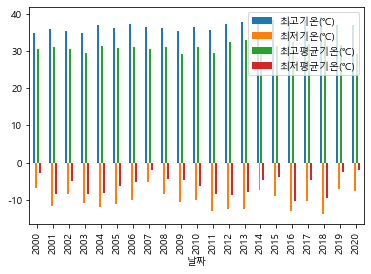

In [56]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus = False)

all_temp2.plot(kind='bar')
plt.show()

In [59]:
def plotTemp(tempdata, startdate, enddate):
    tempdata.loc[startdate:enddate, ['최고기온(℃)', '최저기온(℃)', '평균기온(℃)'] ].plot(style = ['r', 'b', 'g'])
    plt.show()

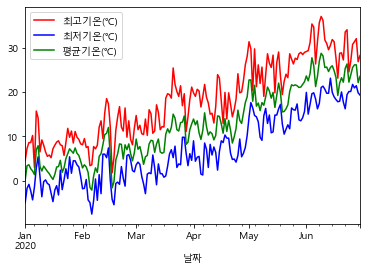

In [60]:
plotTemp(df_tempdata, '2020-01-01', '2020-06-30')

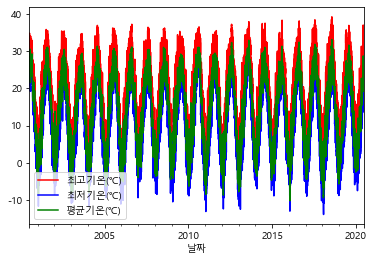

In [61]:
plotTemp(df_tempdata, '2000-07-01', '2020-06-30')

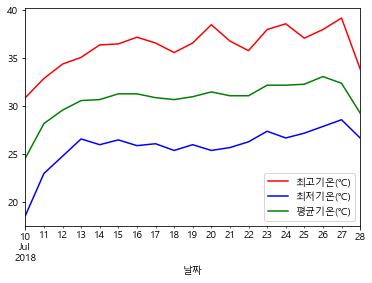

In [64]:
plotTemp(df_tempdata, '2018-07-10','2018-7-28')